# Assignment 10

## Assignment 10.1

What is the idea behind KD-trees? For which problems can a KD-tree be used to speed up the computation time? Given are the following 13 points $P = {P_1(1; 6), P_2(7; 6), P_3(3; 5), P_4(6; 5), P_5(6; 4), P_6(2; 3), P_7(5; 3), P_8(1; 2), P_9(2; 2), P_{10}(4; 2), P_{11}(6; 2), P_{12}(1; 1), P_{13}(2; 1)}$.

a) Build a KD-tree with a minimum leaf size of 3 as the stopping criterion. Choose the widest dimension $ d \in {x, y}$ for splitting the data (of size $n$) using the following median split position MSP:

<div align=center>
    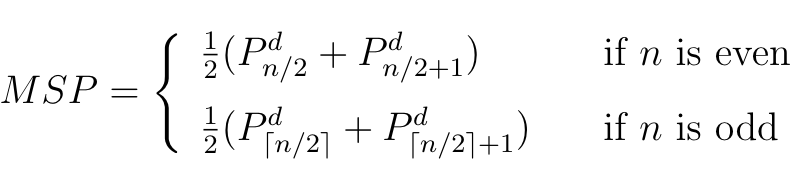
</div>

<!-- 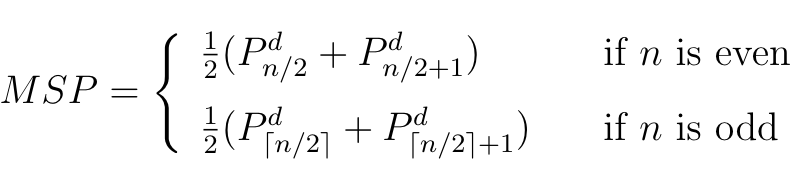 -->

The range along x is 6 and along y is 5, so the root node splits along x.
The first splitting point, along the abscissa, is 3.5


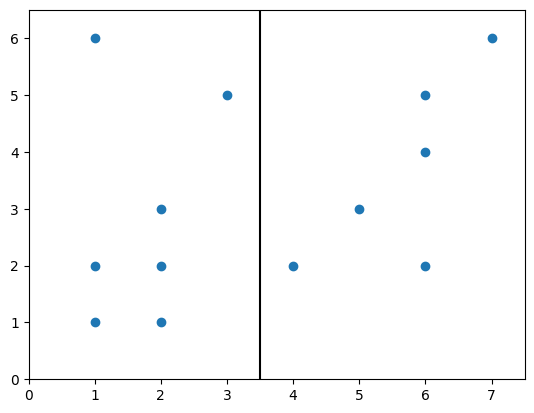

In [226]:
import numpy as np
import matplotlib.pyplot as plt
points = np.array([[1, 6], [7, 6], [3, 5], [6, 4], [6, 5], [2, 3], [5, 3], [1, 2], [2, 2], [4, 2], [6, 2], [1, 1], [2, 1]])
fig, ax = plt.subplots()
ax.set_xlim([0, 7.5])
ax.set_ylim([0, 6.5])
ax.scatter(points[:, 0], points[:, 1])

# Choose which dimension is wider 
print(f"The range along x is {np.ptp(points[:, 0])} and along y is {np.ptp(points[:, 1])}, so the root node splits along x.")

# Initialise the list of splitting criteria
MSP = []

# We start with an odd n
n = 13
points = points[points[:, 0].argsort()]
MSP.append((points[n//2, 0] + points[n//2+1, 0])/2)
print(f"The first splitting point, along the abscissa, is {MSP[0]}")

# Find the median along the x-axis, splitting the space along the x axis 
ax.axvline(MSP[0], color='k')
plt.show()

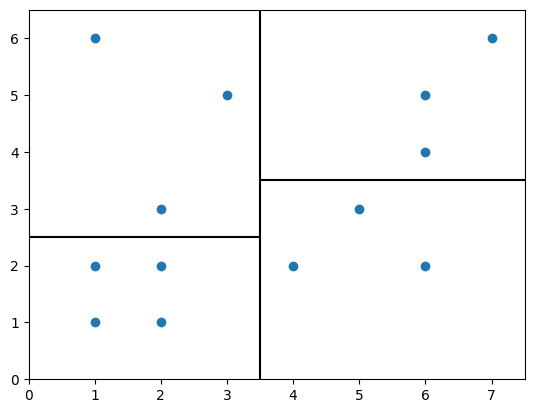

In [227]:
# Then we follow up the search in each box, left and right 
n = len(points[points[:, 0] < MSP[0]])
MSP.append((points[points[:, 0] < MSP[0]][n//2, 1] + points[points[:, 0] < MSP[0]][n//2+1, 1])/2)
ax.hlines(y = MSP[1], xmin=0, xmax=MSP[0], color="black")

n = len(points[points[:, 0] > MSP[0]])
MSP.append((points[points[:, 0] > MSP[0]][n//2, 1] + points[points[:, 0] > MSP[0]][n//2+1, 1])/2)
ax.hlines(y = MSP[2], xmin=MSP[0], xmax=7.5, color="black")
fig

Search the nearest neighbor of the point $S(4; 5)$ with your KD-tree.

In [271]:
from sklearn.neighbors import KDTree
rng = np.random.RandomState(0)
tree = KDTree(points, leaf_size=2)              
dist, ind = tree.query(np.array([[4, 5]]), k=1)                
points[ind][0][0]

array([3, 5])

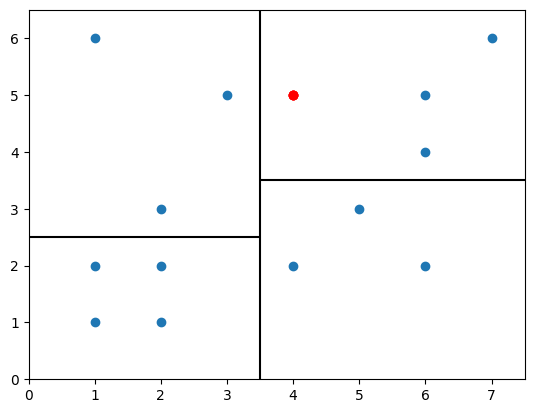

In [275]:
ax.scatter(4, 5, color='r')
plt.Circle((3, 5), 0.2, color='r')
fig